## Hierarichal Clustering
- Here will be not having any centroids with respect to each clsuter

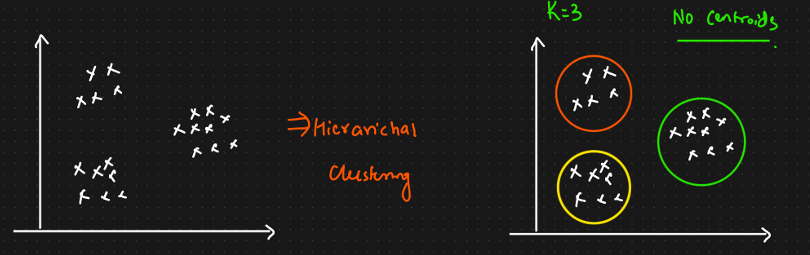

### Types of Hierarichal Clustering
- Agglomerative Clustering -> it means combining
- Divisive Clustering -> it means dividing

### Agglomerative Clustering
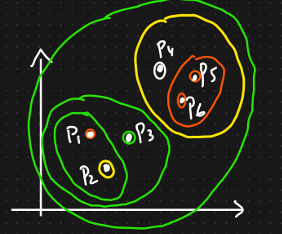

Steps:
- For each data point, initially will consider it as a separate cluster
- Find out the nearest point and create a new cluster
- Keep on doing the step2 process until we get a single cluster

### Dendrogram
- so as we covered all the points n single cluster, now to decide how many clusters will be having in the dataset will be using "Dendrogram"
- all the data points will be in x-axis and y-axis will be having Eucledian distance
- Steps:
    - create the dendrogram by combining or divide the cluster one by one based on distance where the height of the bolck will be the eucledian distance
    - when we combine from bottom-to-top, will be using agglomerative clustering
    - when we divide from top-to-bottom, will be using divisive clustering
    - K values means number of cluster will be selected based on the Eucledian distance threshold
    - whatever threshold will be taking, will create a line in such a way that the number of intersept points will be the K value
    - so means if we decrease the eucledian distance threshold, the number of clusters will increase

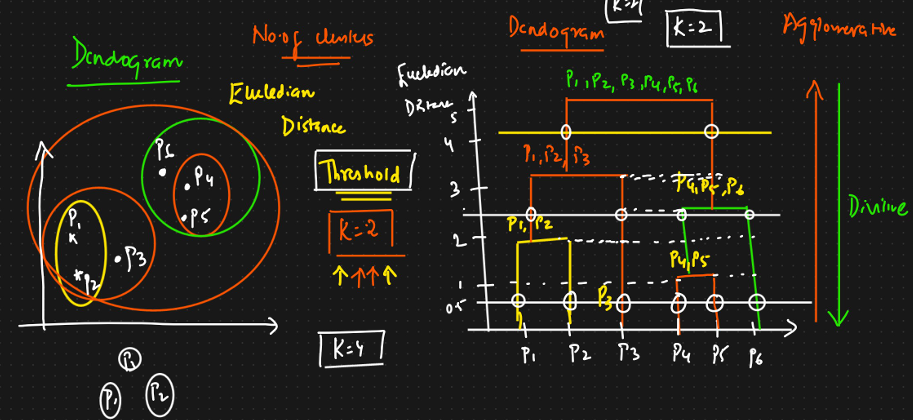

NOTE: selecting the eucledian distance threshold will be a challenge, with the help of dendrogram, there is a simple hack that is **" need to find out the longest vertical line such that none of the horizontal line passes through it"** here the horizontal line means the lines which are made when we extend the block line and not the threshold line

## Practical of Agglomerative Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris
dataset=load_iris()

In [8]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

applying PCA to reduce the features

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_sclaed=pca.fit_transform(df_scaled)

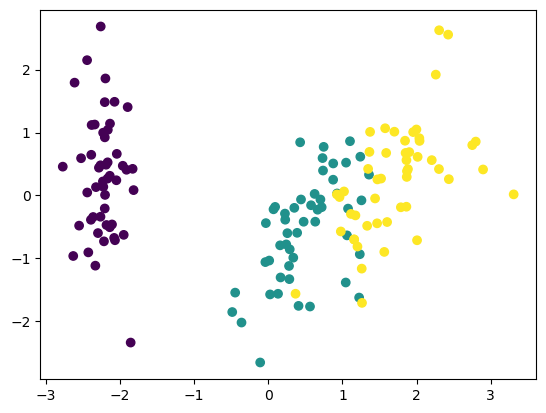

In [13]:
plt.scatter(pca_sclaed[:,0],pca_sclaed[:,1],c=dataset['target'])

creating dendrogram

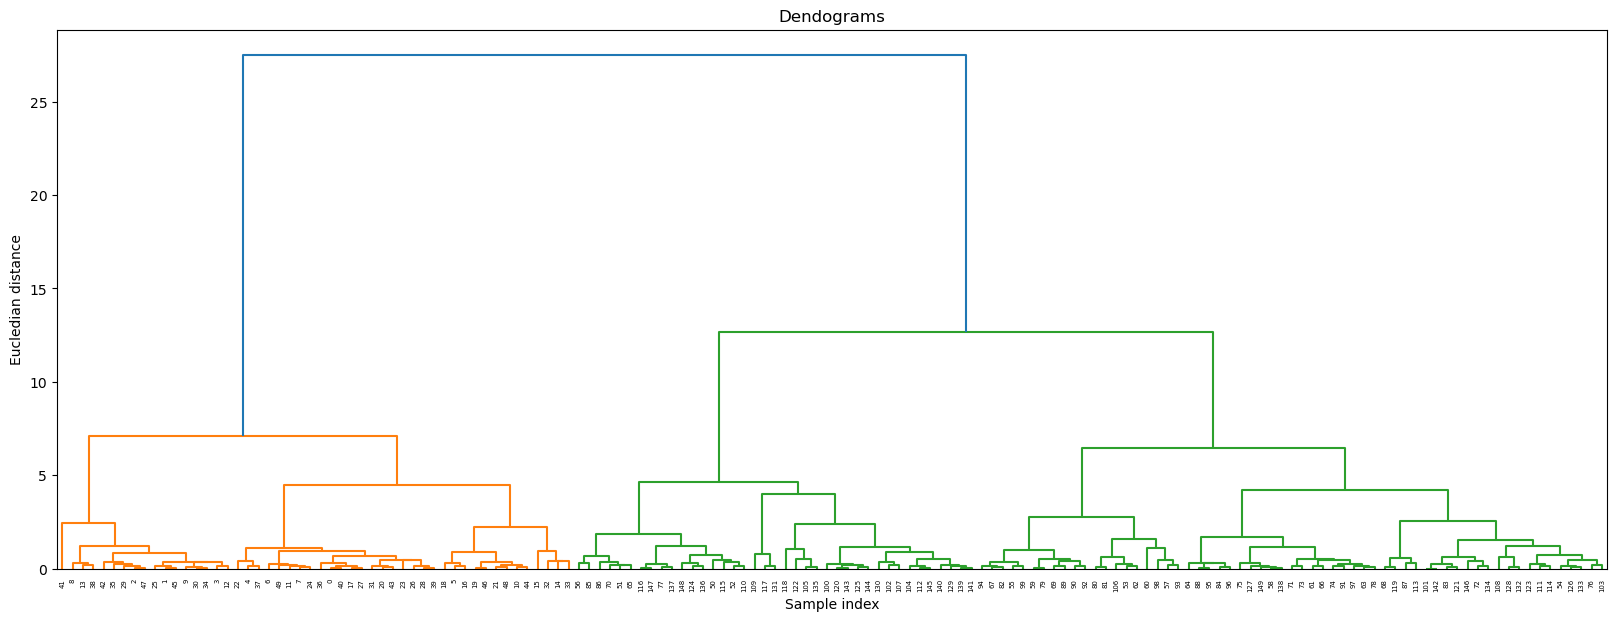

In [ ]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title("Dendrograms")

sc.dendrogram(sc.linkage(pca_sclaed,method='ward'))
plt.xlabel("Sample index")
plt.ylabel("Eucledian distance")
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,linkage='ward')
cluster.fit(pca_sclaed)

AgglomerativeClustering()

In [19]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

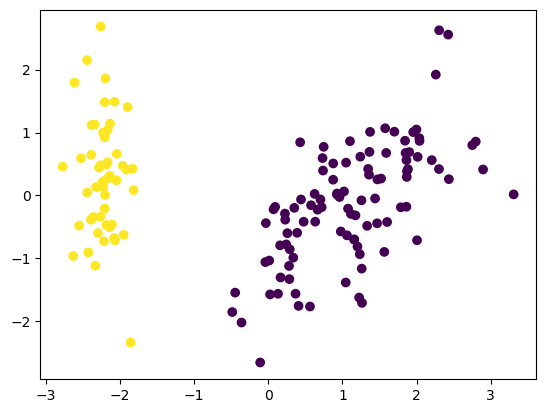

In [20]:
plt.scatter(pca_sclaed[:,0],pca_sclaed[:,1],c=cluster.labels_)